<a href="https://colab.research.google.com/github/rizkyirw/Analitika-Media-Sosial/blob/main/Tugas_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


Nama        : Isro' Rizky Wibowo

NIM         : A12.2020.06443

Mata kuliah : Analitika Media Sosial

Kelompok    : A12.6503

---



# Word Embedding

Word embedding merupakan proses transformasi teks menjadi sebuah angka yang mana akan digunakan untuk pemrosesan Machine Learning hingga Deep Learning dikarenakan Algoritma tersebut tidak dapat memproses karakter teks/string, sehingga membutuhkan angka sebagai input.

Referensi : 
- https://rpubs.com/ahmadhusain/wordembedding
- Materi pada Drive
- http://derwinsuhartono.com/archives/500
- http://matlab.izmiran.ru/help/toolbox/images/enhanc15.html

Contoh Transformasi :

sentence = Saya sudah makan di kantor saat waktu makan malam

maka

dictionary = [`"Saya","sudah","Makan","Di","Kantor","Saat","Waktu","Malam"`]
- Representasi vektor dari sebuah kata mungkin merupakan vektor one-hot encoding di mana 1 mewakili posisi di mana kata itu ada dan 0 di tempat lain.

Representasi vektor '**Malam**' dalam format ini menurut kamus di atas adalah :
[`"Saya","sudah","Makan","Di","Kantor","Saat","Waktu","Malam"`]

[0,0,0,0,0,0,0,1]


## TF - IDF (Term Frequency-Inverse Document Frequency)

Merupakan suatu metode untuk menghitung bobot setiap kata, yang mana hasil dari indexing dapat digunakan untuk mengetahui konteks dari dokumen tersebut. TF-IDF membuat kata yang sering muncul memiliki nilai yang cenderung kecil, sedangkan untuk kata yang semakin jarang muncul akan memiliki nilai yang cenderung besar. Kata yang sering muncul disebut juga Stopwords biasanya dianggap kurang penting, contohnya kata hubung (akan, dan, dengan, dll.)

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
corpus = ['saya berangkat ke kampus untuk belajar',
          'ibu sedang memasak di dapur',
          'kakak sedang bekerja di kantor']

In [3]:
vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, norm = None, smooth_idf=True)

In [4]:
X = vectorizer.fit_transform(corpus)

In [ ]:
print(vectorizer.get_feature_names())

In [6]:
feature_names = vectorizer.get_feature_names()

In [7]:
def tf_idf(text):
  tfidf_matrix = vectorizer.transform([text]).todense()
  feature_index = X[0,:].nonzero()[1]
  skor = zip([feature_names[i] for i in feature_index], [X[0, x] for x in feature_index])
  return dict(skor)

In [8]:
text = "saya berangkat ke kampus untuk belajar"
tf_idf(text)

{'belajar': 1.6931471805599454,
 'untuk': 1.6931471805599454,
 'kampus': 1.6931471805599454,
 'ke': 1.6931471805599454,
 'berangkat': 1.6931471805599454,
 'saya': 1.6931471805599454}

## Co-Occurrence Matrix

Atau disebut juga dengan Gray level co-occurrence matrix atau GLCM, merupakan suatu metode untuk mendapatkan fitur dari suatu citra secara tekstural.GLCM hanya menggunakan 4 arah derajat 0, 45, 90 dan 135 dalam menghitung fitur yang dihasilkan.

Sebagai ilustrasi, gambar berikut menunjukkan bagaimana graycomatrix menghitung tiga nilai pertama dalam GLCM. Dalam output GLCM, elemen (1,1) berisi nilai 1 karena hanya ada satu contoh pada citra masukan di mana dua piksel yang berdekatan secara horizontal masing-masing memiliki nilai 1 dan 1. glcm(1,2) berisi nilai 2 karena ada dua instance di mana dua piksel yang berdekatan secara horizontal memiliki nilai 1 dan 2. Elemen (1,3) dalam GLCM memiliki nilai 0 karena tidak ada instance dari dua piksel yang berdekatan secara horizontal dengan nilai 1 dan 3. graycomatrix terus memproses gambar input, memindai gambar untuk pasangan piksel lainnya (i,j) dan merekam jumlah dalam elemen GLCM yang sesuai.

Referensi : http://matlab.izmiran.ru/help/toolbox/images/enhanc15.html

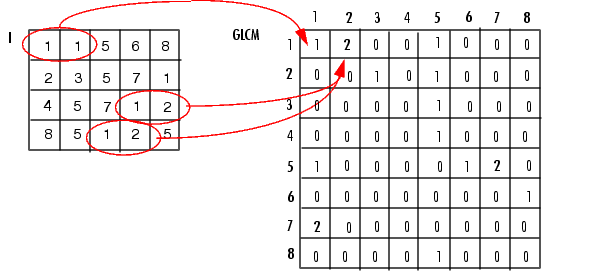

## Continuous Bag of Words (CBOW)

### Apa yang dimaksud Bag of Word

Model bag-of-words, atau disingkat BoW, adalah cara mengekstrak fitur dari teks untuk digunakan dalam pemodelan, seperti dengan algoritme machine learning.

Pendekatannya sangat sederhana dan fleksibel, dan dapat digunakan dalam berbagai cara untuk mengekstrak fitur dari dokumen.

bag of words (kantong kata) adalah representasi teks yang menggambarkan kemunculan kata-kata dalam dokumen.

#### Membuat Dokumen Vektor

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [10]:
doc1 = "Benzema is winning trophy Ballon d'Or yesterday. Mane is 2nd place Ballon d'Or nominated."
doc2 = "Messi is not in top 10 Ballon d'Or nominated."

bow_vectorizer = CountVectorizer()

X = bow_vectorizer.fit_transform([doc1,doc2])

bow_df = pd.DataFrame(X.toarray(),columns=bow_vectorizer.get_feature_names_out())
bow_df.head()

,10,2nd,ballon,benzema,in,is,mane,messi,nominated,not,or,place,top,trophy,winning,yesterday
0,0,1,2,1,0,2,1,0,1,0,2,1,0,1,1,1
1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,0


### Skip-Gram

**Skip-gram** merupakan teknik yang digunakan di area speech processing, dimana n-gram yang dibentuk kemudian ditambahkan juga dengan tindakan “skip” pada token-tokennya. Skip-gram bisa digunakan untuk menangani data sparsity yang banyak ditemui sebagai problem besar pada penelitian natural language processing.

Sebagai contohnya, apabila hendak dibentuk trigram dari kalimat “I hit the tennis ball”, maka hasilnya akan menjadi:

1.   I hit the
2.   hit the tennis
3.   the tennis ball

Akan tetapi, ada pendapat yang mengatakan bahwa ada kombinasi 3 kata dari kalimat tersebut yang penting dari kalimat tersebut, contohnya “hit the ball”. Skip-gram memungkinkan bentuk kombinasi tersebut untuk dimodelkan.

Untuk membentuk k-skip-n-grams, ada dua nilai yang harus didefinisikan, yaitu k (jumlah kata yang di-skip) dan n (banyak kata dalam n-gram, e.g. bigram (2-gram), trigram (3-gram), dll.).

Hasil dari 4-skip-n-gram akan mencakup 4 skip, 3 skip, 3 skip, 2 skip, 1 skip, dan 0 skip (n-gram jenis trakhir ini dibentuk dari adjacent words).

Apabila kita memiliki kalimat sebagai berikut:

“Penelitian membutuhkan ketekunan yang tinggi”

Maka, n-gram dan skip-gram yang terbentuk adalah sebagai berikut:

- Bigram: {penelitian membutuhkan, membutuhkan ketekunan, ketekunan yang, yang tinggi}

- 2-skip-bi-gram (mencakup 1-skip-bi-gram dan 0-skip-bi-gram):

0-skip-bi-gram: {Penelitian membutuhkan, membutuhkan ketekunan, ketekunan yang, yang tinggi}, 1-skip-bi-gram: {penelitian ketekunan, membutuhkan yang, ketekunan tinggi}, 2-skip-bi-gram: {penelitian yang, membutuhkan tinggi}

Skip yang dilakukan tidak diperbolehkan untuk melewati batas dari satu kalimat.

Jumlah dari skip-gram yang terbentuk dengan diketahui jumlah n pada n-gram yang hendak dibentuk bisa dihitung. Untuk sejumlah n kata pada kalimat, rumus untuk menghitung jumlah trigram dengan jumlah skip k adalah:

(n – (k+2) ) (k+1), untuk n > k+3

Secara lebih rinci, data lengkap mengenai jumlah data hasil pemodelan n-gram dan k-skip-n-gram adalah sebagai berikut:

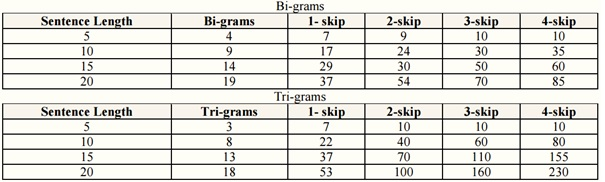

Training data yang digunakan adalah British National Corpus (BNC) sejumlah 100 juta kata dan English Gigaword sejumlah 1.7 miliar kata digunakan untuk mengujicobakan pemodelan skip-gram pada data testing yang diambil dari Gigaword Corpus (300000 kata), Eight Recent New Documents, dan Google Translation (7 artikel berita di Cina dan diterjemahkan ke dalam Bahasa Inggris).

Dari 2 kali eksperimen yang membandingkan adjacent n-gram dengan k-skip-n-gram, diperoleh hasil bahwa

- Banyak bigram yang terobservasi ketika menggunakan skip, dan muncul di data testing
- Skip-gram tidak meningkatkan coverage trigram. Hal ini disebabkan karena dokumen yang digunakan bukan korpus pada domain yang sama.

Dari sisi manfaat, skip-gram bisa mendemonstrasikan secara akurat untuk memodelkan context namun tidak condong pada efek dari trigram modelling.

Referensi : http://derwinsuhartono.com/archives/500